In [147]:

cords = []

def measure(lat, lon, cords):


    for i in range (len(lat[1::10])):
        lat2 = lat[i]
        lat1 = lat[i-1]
        lon2 = lon[i]
        lon1 = lon[i-1]
        dLat = math.radians(lat2 - lat1)
        dLon = math.radians(lon2 - lon1)
        a = math.sin(dLat/2) * math.sin(dLat/2) + \
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
            math.sin(dLon/2) * math.sin(dLon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = R * c
        cords.append(d*1000)
        
        

    return c
        #return d * 1000  # meters

c = measure(latitude,longitude, cords)
#print(cx)

# Начало

In [2]:
import csv
import matplotlib.pyplot as plt
from rdp import rdp
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler


In [3]:
d_time = []
longitude = []
latitude = []
c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            d_time.append(str(row[1])[12:])
            longitude.append(float(row[2]))
            latitude.append(float(row[3]))
        c+=1


Text(0.5, 1.0, 'Map in LonLat')

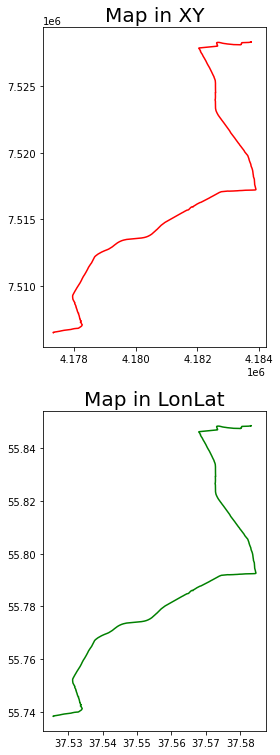

In [29]:
f=plt.figure()
f.set_figwidth(4)
f.set_figheight(20)

cy = []
cx = []
#cxx = []
#cyy=[]
R = 6378137  # Radius of earth in M

for i in range(len(longitude)):
    cy.append(math.log(math.tan(math.pi / 4 + math.radians(latitude[i]) / 2)) * R)
    cx.append(math.radians(longitude[i]) * R)
    #if bearing[i]==0:
        #cyy.append(latitude[i])
        #cxx.append(longitude[i])
        
        

plt.subplot(311)
plt.plot(cx,cy,'r')
plt.title('Map in XY', fontsize=20)

plt.subplot(312)
plt.plot(longitude,latitude,'g')
plt.title('Map in LonLat', fontsize=20)

#plt.subplot(313)
#plt.scatter(cxx,cyy)

# Разминка 2

In [5]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
            
        c+=1


In [6]:
scaler = MinMaxScaler()

In [7]:
speed_OBD_1 = np.array([scaler.fit_transform(np.expand_dims(speed_OBD,axis = 1))])
speed_GPS_1 = np.array([scaler.fit_transform(np.expand_dims(speed_GPS,axis = 1))])
print(type(speed_OBD_1))
print(np.shape(speed_OBD_1))

<class 'numpy.ndarray'>
(1, 22260, 1)


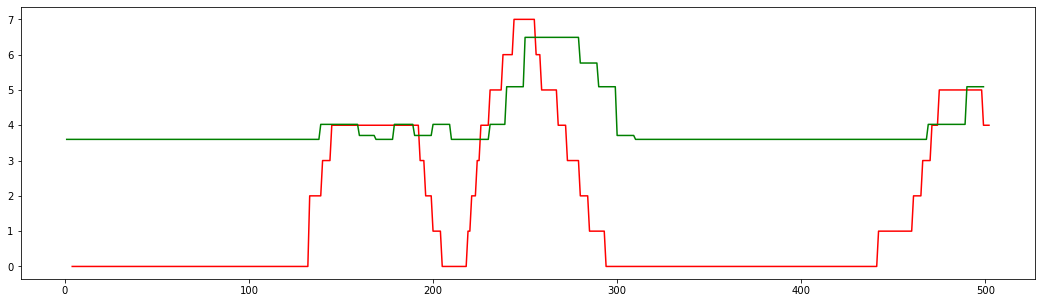

In [8]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))][4:503], speed_OBD[4:503],'r')
plt.plot([i for i in range(len(time_GPS))][1:500], speed_GPS[1:500],'g')

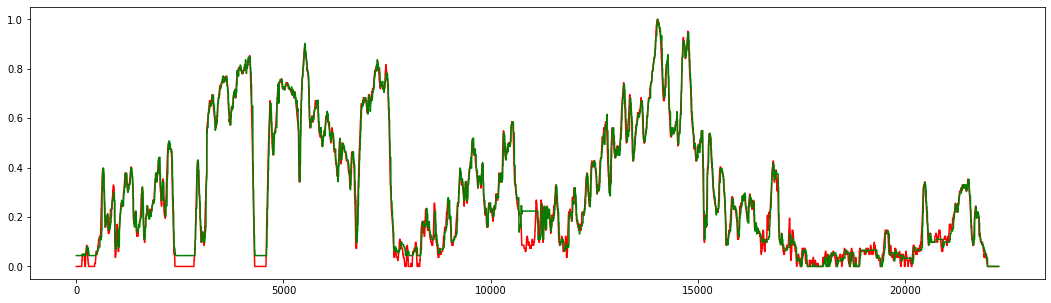

In [9]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))], speed_OBD_1[0,::,0],'r')
plt.plot([i for i in range(len(time_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('Bearing(t)', fontsize=20)

# Разминка 3

In [17]:
time_GPS = []
speed_GPS = []  
bearing = []
c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
                bearing.append(float(row[7]))
        c+=1


Text(0.5, 1.0, 'Bearing(t)')

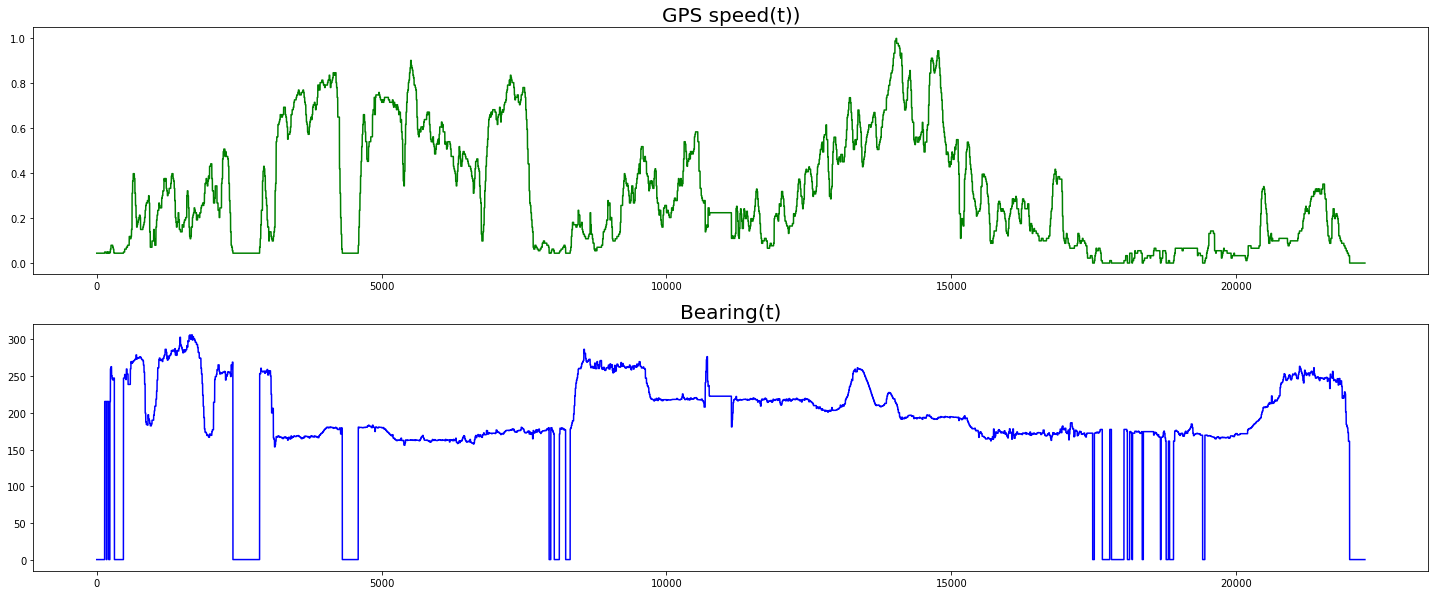

In [25]:
f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('GPS speed(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS))],bearing,'b')
plt.title('Bearing(t)', fontsize=20)

In [31]:
velx = []
vely = []
for i in range(len(bearing)):
    V = speed_GPS[i]
    Vx = V*math.cos(bearing[i])
    Vy = V*math.sin(bearing[i])
    velx.append(Vx)
    vely.append(Vy)


Text(0.5, 1.0, 'vely(t)')

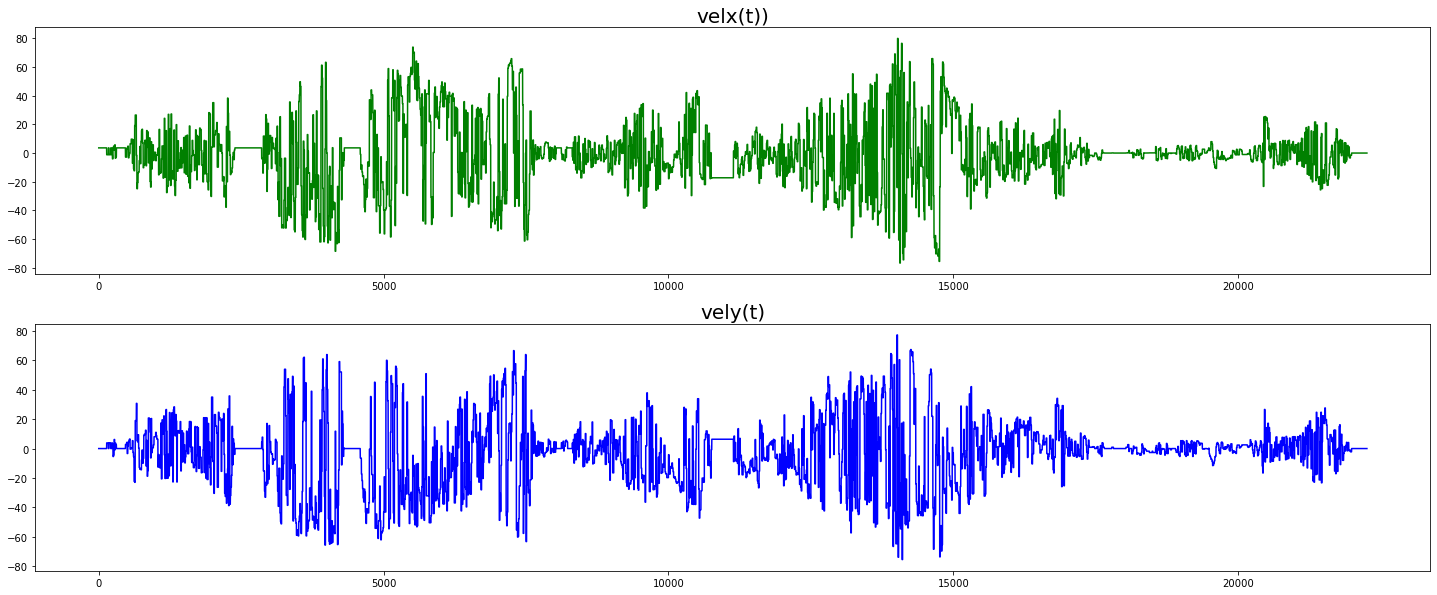

In [33]:
#глабольно вообще ничего не дает, 
#но вероятно если умножать скорость на время, то можно получить карту, если строить v(t) напрвленно

f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS))], velx,'g')
plt.title('velx(t))',fontsize=20)

plt.plot([i for i in range(len(time_GPS))],vely,'b')
plt.title('vely(t)', fontsize=20)

# ВАААА ЭТО ЖЕ МОЖНО КРУТО В ПОЛЯРНЫХ ПОСТРОИТЬ, ТОЛЬКО ЩАС ПРИДУМАЛА. Разложить получилось, а угол и вектор будут нарисуют что-то
# Мб, если вечером не умру,попробую сделать